In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [10]:
# 6. MLP + Batch-Norm on hidden Layers + AdamOptimizer

# Multilayer perceptron


from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(128, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 33,413
Trainable params: 33,029
Non-trainable params: 384
_________________________________________________________________


In [11]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))


Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.6308 - accuracy: 0.8421 - val_loss: 0.4033 - val_accuracy: 0.9072
Epoch 2/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.2030 - accuracy: 0.9504 - val_loss: 0.2061 - val_accuracy: 0.9465
Epoch 3/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.1471 - accuracy: 0.9613 - val_loss: 0.1504 - val_accuracy: 0.9594
Epoch 4/500
87554/87554 [==============================] - 2s 25us/step - loss: 0.1256 - accuracy: 0.9663 - val_loss: 0.1365 - val_accuracy: 0.9622
Epoch 5/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.1198 - accuracy: 0.9663 - val_loss: 0.1253 - val_accuracy: 0.9653
Epoch 6/500
87554/87554 [==============================] - 3s 30us/step - loss: 0.1085 - accuracy: 0.9700 - val_loss: 0.1224 - val_accuracy: 0.9672
Epoch 7/500
87554/87554 [==============================] - 3s

87554/87554 [==============================] - 2s 28us/step - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0998 - val_accuracy: 0.9741
Epoch 55/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.0625 - accuracy: 0.9813 - val_loss: 0.0992 - val_accuracy: 0.9742
Epoch 56/500
87554/87554 [==============================] - 3s 29us/step - loss: 0.0705 - accuracy: 0.9791 - val_loss: 0.0979 - val_accuracy: 0.9744
Epoch 57/500
87554/87554 [==============================] - 2s 26us/step - loss: 0.0598 - accuracy: 0.9817 - val_loss: 0.0970 - val_accuracy: 0.9746
Epoch 58/500
87554/87554 [==============================] - 2s 28us/step - loss: 0.0593 - accuracy: 0.9823 - val_loss: 0.0993 - val_accuracy: 0.9737
Epoch 59/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0724 - accuracy: 0.9794 - val_loss: 0.0989 - val_accuracy: 0.9745
Epoch 60/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0588 - accuracy: 0.9827 - val_loss: 

Epoch 109/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0924 - val_accuracy: 0.9777
Epoch 110/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0940 - val_accuracy: 0.9774
Epoch 111/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0940 - val_accuracy: 0.9777
Epoch 112/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0969 - val_accuracy: 0.9770
Epoch 113/500
87554/87554 [==============================] - 4s 40us/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0989 - val_accuracy: 0.9769
Epoch 114/500
87554/87554 [==============================] - 3s 35us/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0976 - val_accuracy: 0.9771
Epoch 115/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0407 - accuracy:

87554/87554 [==============================] - 5s 56us/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.1055 - val_accuracy: 0.9769
Epoch 164/500
87554/87554 [==============================] - 4s 46us/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.1053 - val_accuracy: 0.9761
Epoch 165/500
87554/87554 [==============================] - 5s 61us/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.1034 - val_accuracy: 0.9772
Epoch 166/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.1044 - val_accuracy: 0.9770
Epoch 167/500
87554/87554 [==============================] - 4s 47us/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.1033 - val_accuracy: 0.9778
Epoch 168/500
87554/87554 [==============================] - 5s 53us/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.1047 - val_accuracy: 0.9772
Epoch 169/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0282 - accuracy: 0.9914 - val_

Epoch 218/500
87554/87554 [==============================] - 4s 42us/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.1076 - val_accuracy: 0.9777
Epoch 219/500
87554/87554 [==============================] - 4s 40us/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.1057 - val_accuracy: 0.9777
Epoch 220/500
87554/87554 [==============================] - 4s 44us/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.1043 - val_accuracy: 0.978023 - accuracy: 0.
Epoch 221/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.1047 - val_accuracy: 0.9783
Epoch 222/500
87554/87554 [==============================] - 3s 38us/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.1055 - val_accuracy: 0.9794
Epoch 223/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.1064 - val_accuracy: 0.9772
Epoch 224/500
87554/87554 [==============================] - 3s 39us/step - loss: 0

87554/87554 [==============================] - 3s 36us/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.1135 - val_accuracy: 0.9778
Epoch 273/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.1143 - val_accuracy: 0.9785
Epoch 274/500
87554/87554 [==============================] - 3s 38us/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.1144 - val_accuracy: 0.9778
Epoch 275/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.1118 - val_accuracy: 0.9784
Epoch 276/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0266 - accuracy: 0.9910 - val_loss: 0.1126 - val_accuracy: 0.9776
Epoch 277/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.1099 - val_accuracy: 0.9789
Epoch 278/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0173 - accuracy: 0.9944 - val_

87554/87554 [==============================] - 3s 35us/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.1199 - val_accuracy: 0.9770
Epoch 327/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.1151 - val_accuracy: 0.9785
Epoch 328/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.1153 - val_accuracy: 0.9783
Epoch 329/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0248 - accuracy: 0.9918 - val_loss: 0.1179 - val_accuracy: 0.9782
Epoch 330/500
87554/87554 [==============================] - 3s 38us/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.1182 - val_accuracy: 0.9786
Epoch 331/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.1178 - val_accuracy: 0.9779
Epoch 332/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0138 - accuracy: 0.9958 - val_

Epoch 381/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.1251 - val_accuracy: 0.9781
Epoch 382/500
87554/87554 [==============================] - 3s 40us/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.1250 - val_accuracy: 0.9785- loss: 0
Epoch 383/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.1265 - val_accuracy: 0.9778
Epoch 384/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.1258 - val_accuracy: 0.9770
Epoch 385/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0232 - accuracy: 0.9922 - val_loss: 0.1269 - val_accuracy: 0.9768
Epoch 386/500
87554/87554 [==============================] - 3s 39us/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.1270 - val_accuracy: 0.9763
Epoch 387/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0171 - 

87554/87554 [==============================] - 3s 36us/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.1290 - val_accuracy: 0.9788
Epoch 436/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.1315 - val_accuracy: 0.9785
Epoch 437/500
87554/87554 [==============================] - 3s 34us/step - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.1272 - val_accuracy: 0.9758
Epoch 438/500
87554/87554 [==============================] - 3s 36us/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.1276 - val_accuracy: 0.9770
Epoch 439/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.1272 - val_accuracy: 0.9777
Epoch 440/500
87554/87554 [==============================] - 3s 40us/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.1261 - val_accuracy: 0.9778
Epoch 441/500
87554/87554 [==============================] - 3s 37us/step - loss: 0.0095 - accuracy: 0.9970 - val_

87554/87554 [==============================] - 4s 43us/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.1380 - val_accuracy: 0.9787
Epoch 490/500
87554/87554 [==============================] - 4s 40us/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1400 - val_accuracy: 0.9785
Epoch 491/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.1407 - val_accuracy: 0.9789
Epoch 492/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.1388 - val_accuracy: 0.9789
Epoch 493/500
87554/87554 [==============================] - 4s 43us/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.1512 - val_accuracy: 0.9759
Epoch 494/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0455 - accuracy: 0.9865 - val_loss: 0.1485 - val_accuracy: 0.9757
Epoch 495/500
87554/87554 [==============================] - 4s 41us/step - loss: 0.0192 - accuracy: 0.9937 - val_

In [12]:
y_pred = model_batch.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.83      0.72      0.77       556
           2       0.94      0.93      0.93      1448
           3       0.81      0.71      0.76       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.87      0.89     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.14442630712312768
Test accuracy: 0.9776173830032349


<IPython.core.display.Javascript object>


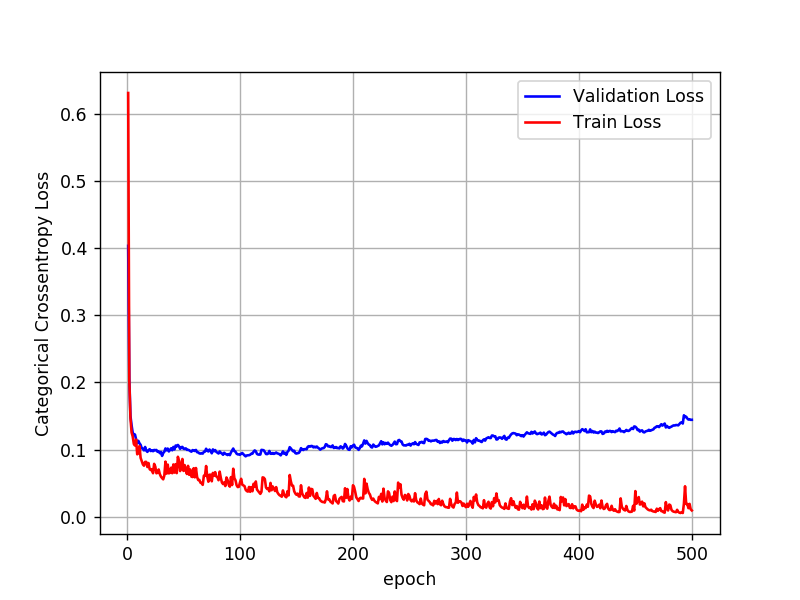

In [13]:
score = model_batch.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [14]:
#              precision    recall  f1-score   support

#           0       0.99      0.99      0.99     18118
#           1       0.83      0.72      0.77       556
#           2       0.94      0.93      0.93      1448
#           3       0.81      0.71      0.76       162
#           4       0.98      0.98      0.98      1608

#    accuracy                           0.98     21892
#   macro avg       0.91      0.87      0.89     21892
# weighted avg       0.98      0.98      0.98     21892

# Test score: 0.14442630712312768
# Test accuracy: 0.9776173830032349